In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer

### Data prep

In [7]:
df = pd.read_csv('./FINAL_USO.csv')

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.describe()

,open,high,low,close,adj_close,volume,sp_open,sp_high,sp_low,sp_close,...,gdx_low,gdx_close,gdx_adj_close,gdx_volume,uso_open,uso_high,uso_low,uso_close,uso_adj_close,uso_volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


### EDA

adj_close is a target field

<Axes: xlabel='adj_close', ylabel='Count'>

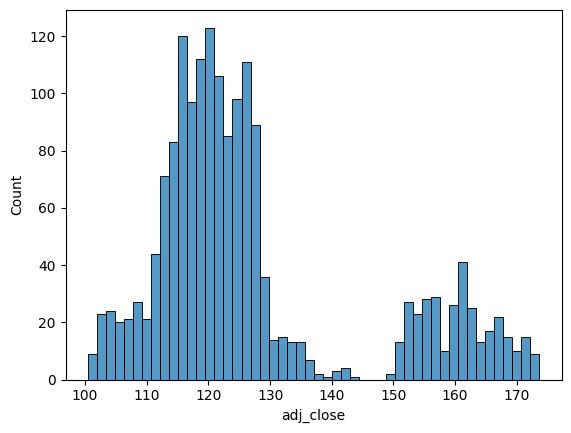

In [10]:
sns.histplot(df.adj_close, bins = 50)

no tails, so no need for logarithmic transform

<Axes: >

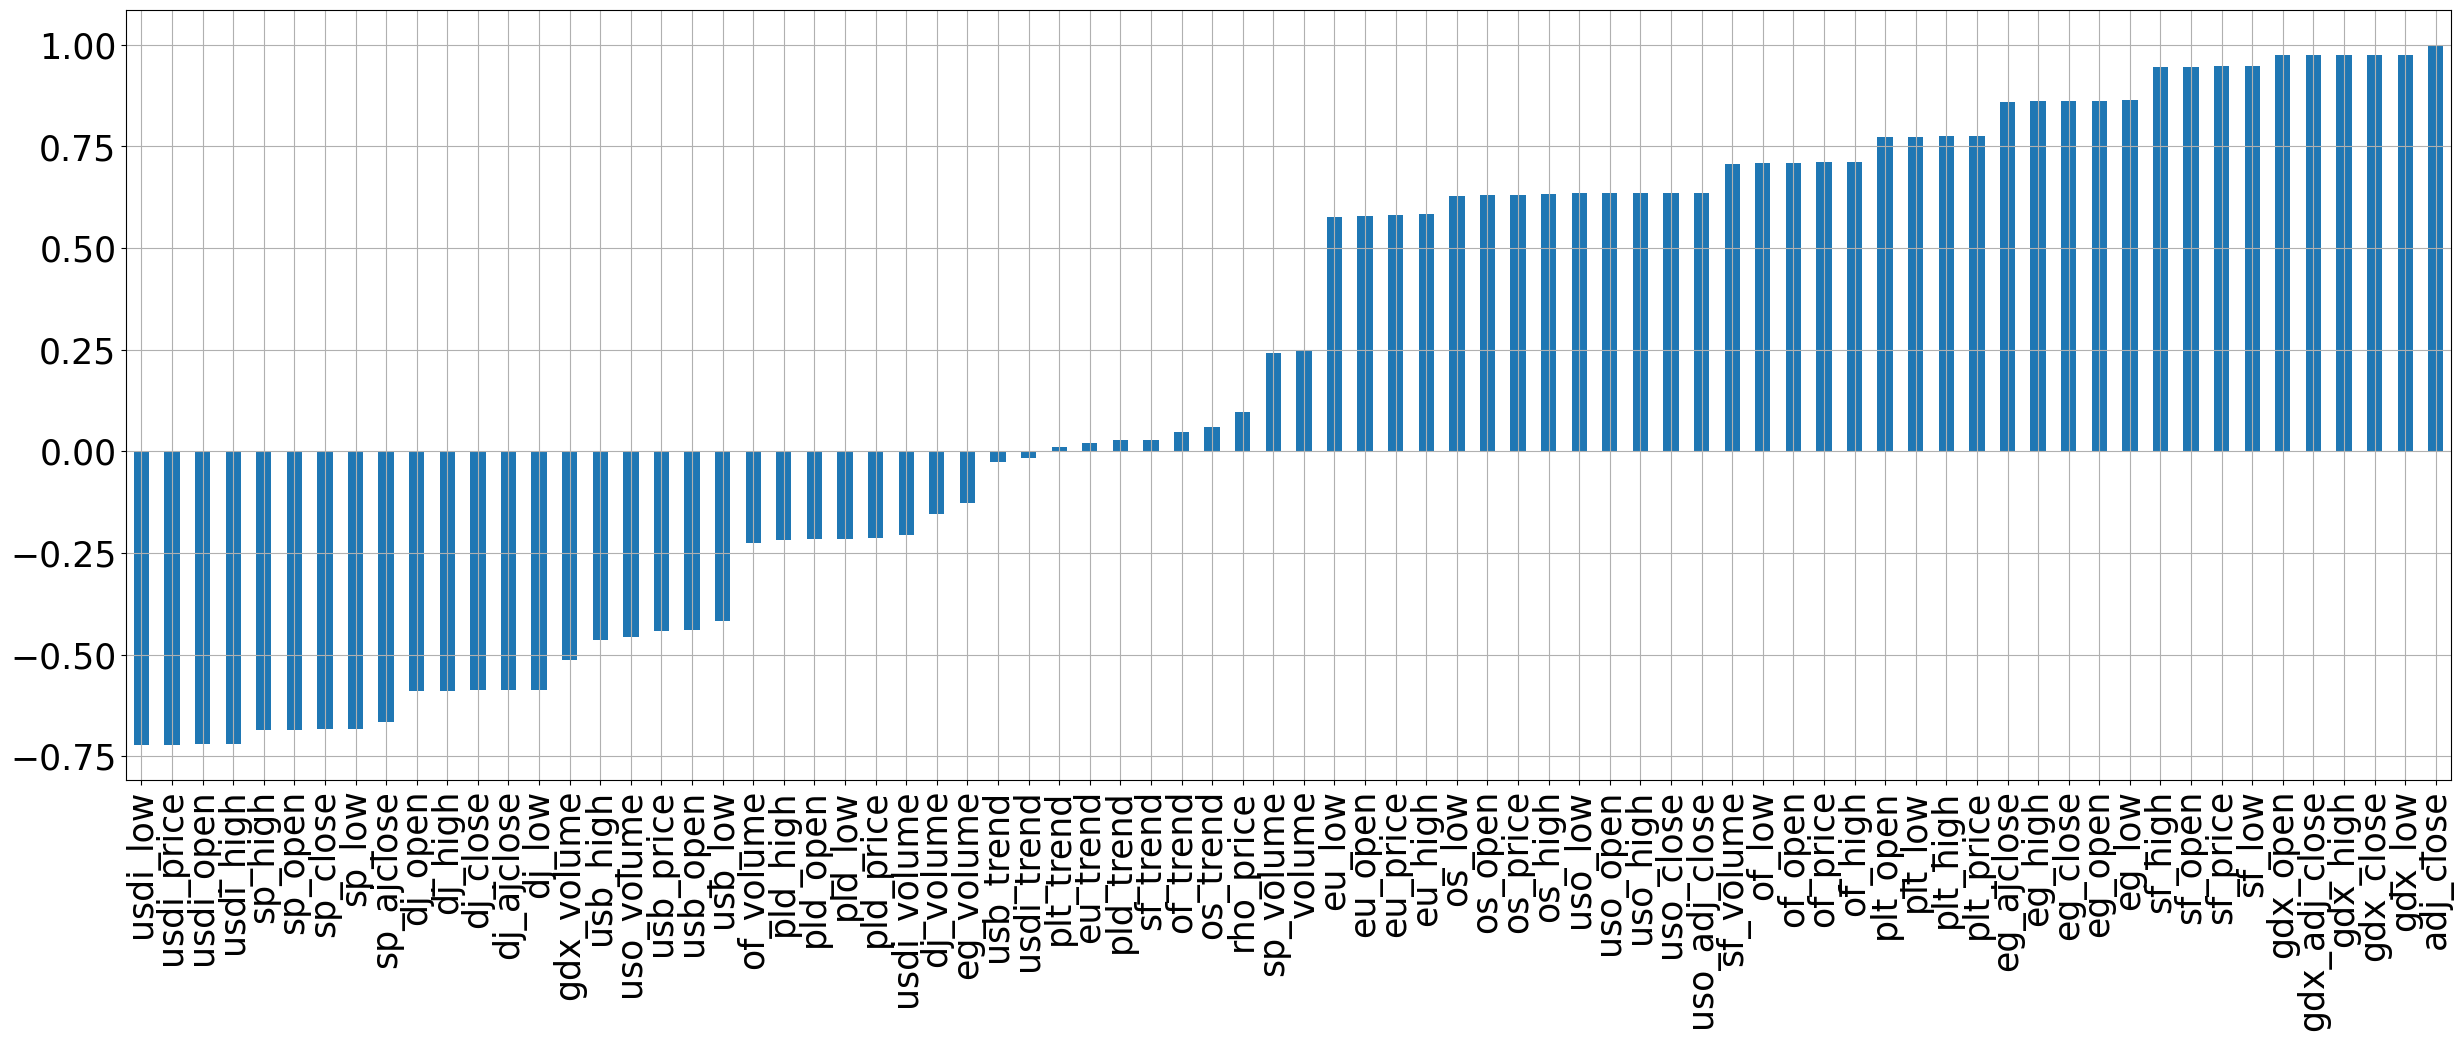

In [11]:
excl = ['date', 'open', 'high', 'close', 'low']
df_final = df[df.columns[~df.columns.isin(excl)]]
cdf = df_final.corrwith(df.adj_close).sort_values(ascending = True)

cdf.plot.bar(
    figsize = (30, 10), fontsize = 25,
    rot = 90,
    grid = True
)

<Axes: >

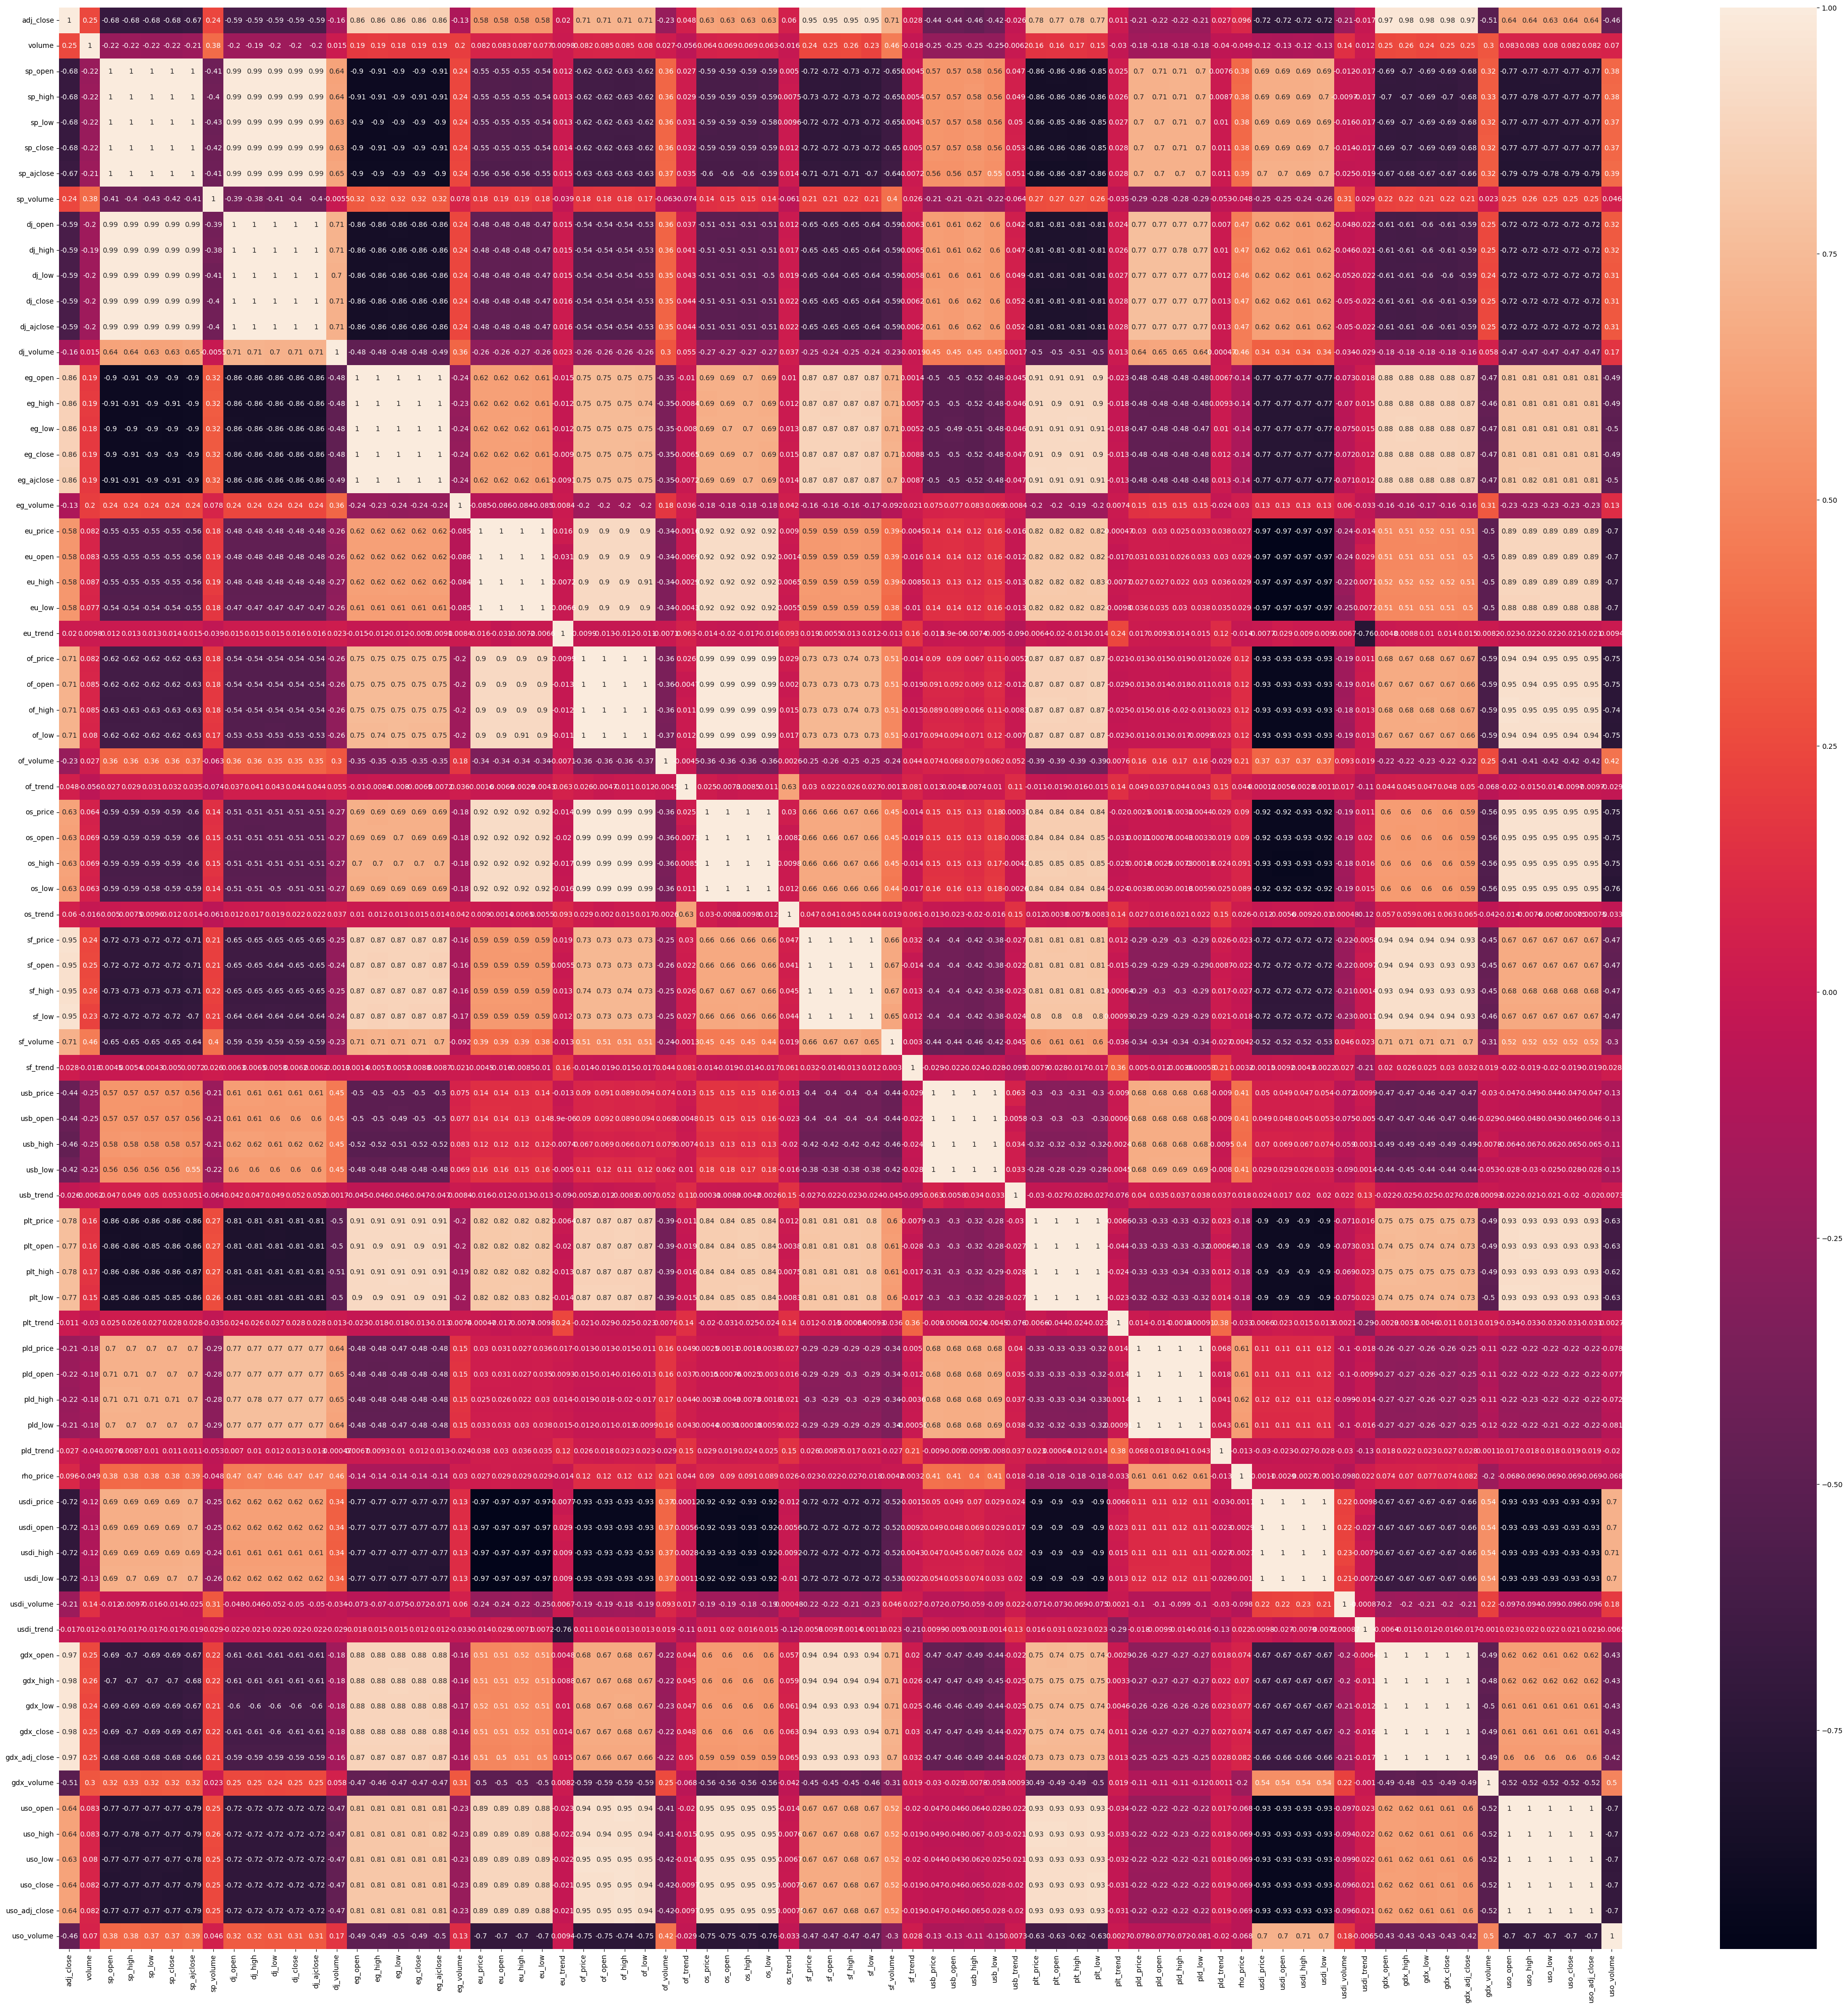

In [12]:
plt.figure(figsize=(50, 50)) 
sns.heatmap(df_final.corr(), annot = True)

In [13]:
final_cols = []

for n in df.columns.tolist():
    if "volume" in n or "adj" in n or "aj" in n or "trend" in n: final_cols.append(n)

final_cols

['adj_close',
 'volume',
 'sp_ajclose',
 'sp_volume',
 'dj_ajclose',
 'dj_volume',
 'eg_ajclose',
 'eg_volume',
 'eu_trend',
 'of_volume',
 'of_trend',
 'os_trend',
 'sf_volume',
 'sf_trend',
 'usb_trend',
 'plt_trend',
 'pld_trend',
 'usdi_volume',
 'usdi_trend',
 'gdx_adj_close',
 'gdx_volume',
 'uso_adj_close',
 'uso_volume']

In [14]:
df_final = df[df.columns[df.columns.isin(final_cols)]]
df_final

,adj_close,volume,sp_ajclose,sp_volume,dj_ajclose,dj_volume,eg_ajclose,eg_volume,eu_trend,of_volume,...,sf_trend,usb_trend,plt_trend,pld_trend,usdi_volume,usdi_trend,gdx_adj_close,gdx_volume,uso_adj_close,uso_volume
0,152.330002,21521900,105.441238,199109200,11868.80957,136930000,70.431755,787900,1,14330,...,1,1,0,1,22850,0,48.973877,20605600,36.130001,12616700
1,155.229996,18124300,105.597549,220481400,11866.38965,389520000,72.364037,896600,1,140080,...,0,0,1,1,13150,0,49.921513,16285400,36.270000,12578800
2,154.869995,12547200,104.468536,183903000,11766.25977,135170000,62.509384,2096700,0,147880,...,0,0,0,0,970,0,48.490578,15120200,36.200001,7418200
3,156.979996,9136300,107.629784,225418100,12103.58008,165180000,64.731514,875300,1,170240,...,1,1,1,1,22950,1,50.215282,11644900,37.560001,10041600
4,157.160004,11996100,107.838242,194230900,12107.74023,163250000,66.180725,837600,0,145090,...,0,1,0,1,24140,1,50.186852,8724300,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,120.019997,9736400,234.339996,147311600,21792.19922,308420000,2.950000,655100,1,76220,...,1,0,0,1,13930,0,21.090000,60507000,9.290000,21598200
1714,119.660004,14293500,246.179993,218485400,22878.44922,433080000,3.000000,746300,0,77000,...,1,1,1,1,15660,1,20.620001,76365200,9.900000,40978800
1715,120.570000,11874400,248.070007,186267300,23138.82031,407940000,2.950000,744000,1,102590,...,1,0,0,1,20520,0,20.969999,52393000,9.620000,36578700
1716,121.059998,6864700,247.750000,153100200,23062.40039,336510000,2.900000,1061100,1,17110,...,1,0,0,0,14170,0,20.600000,49835000,9.530000,22803400


<Axes: >

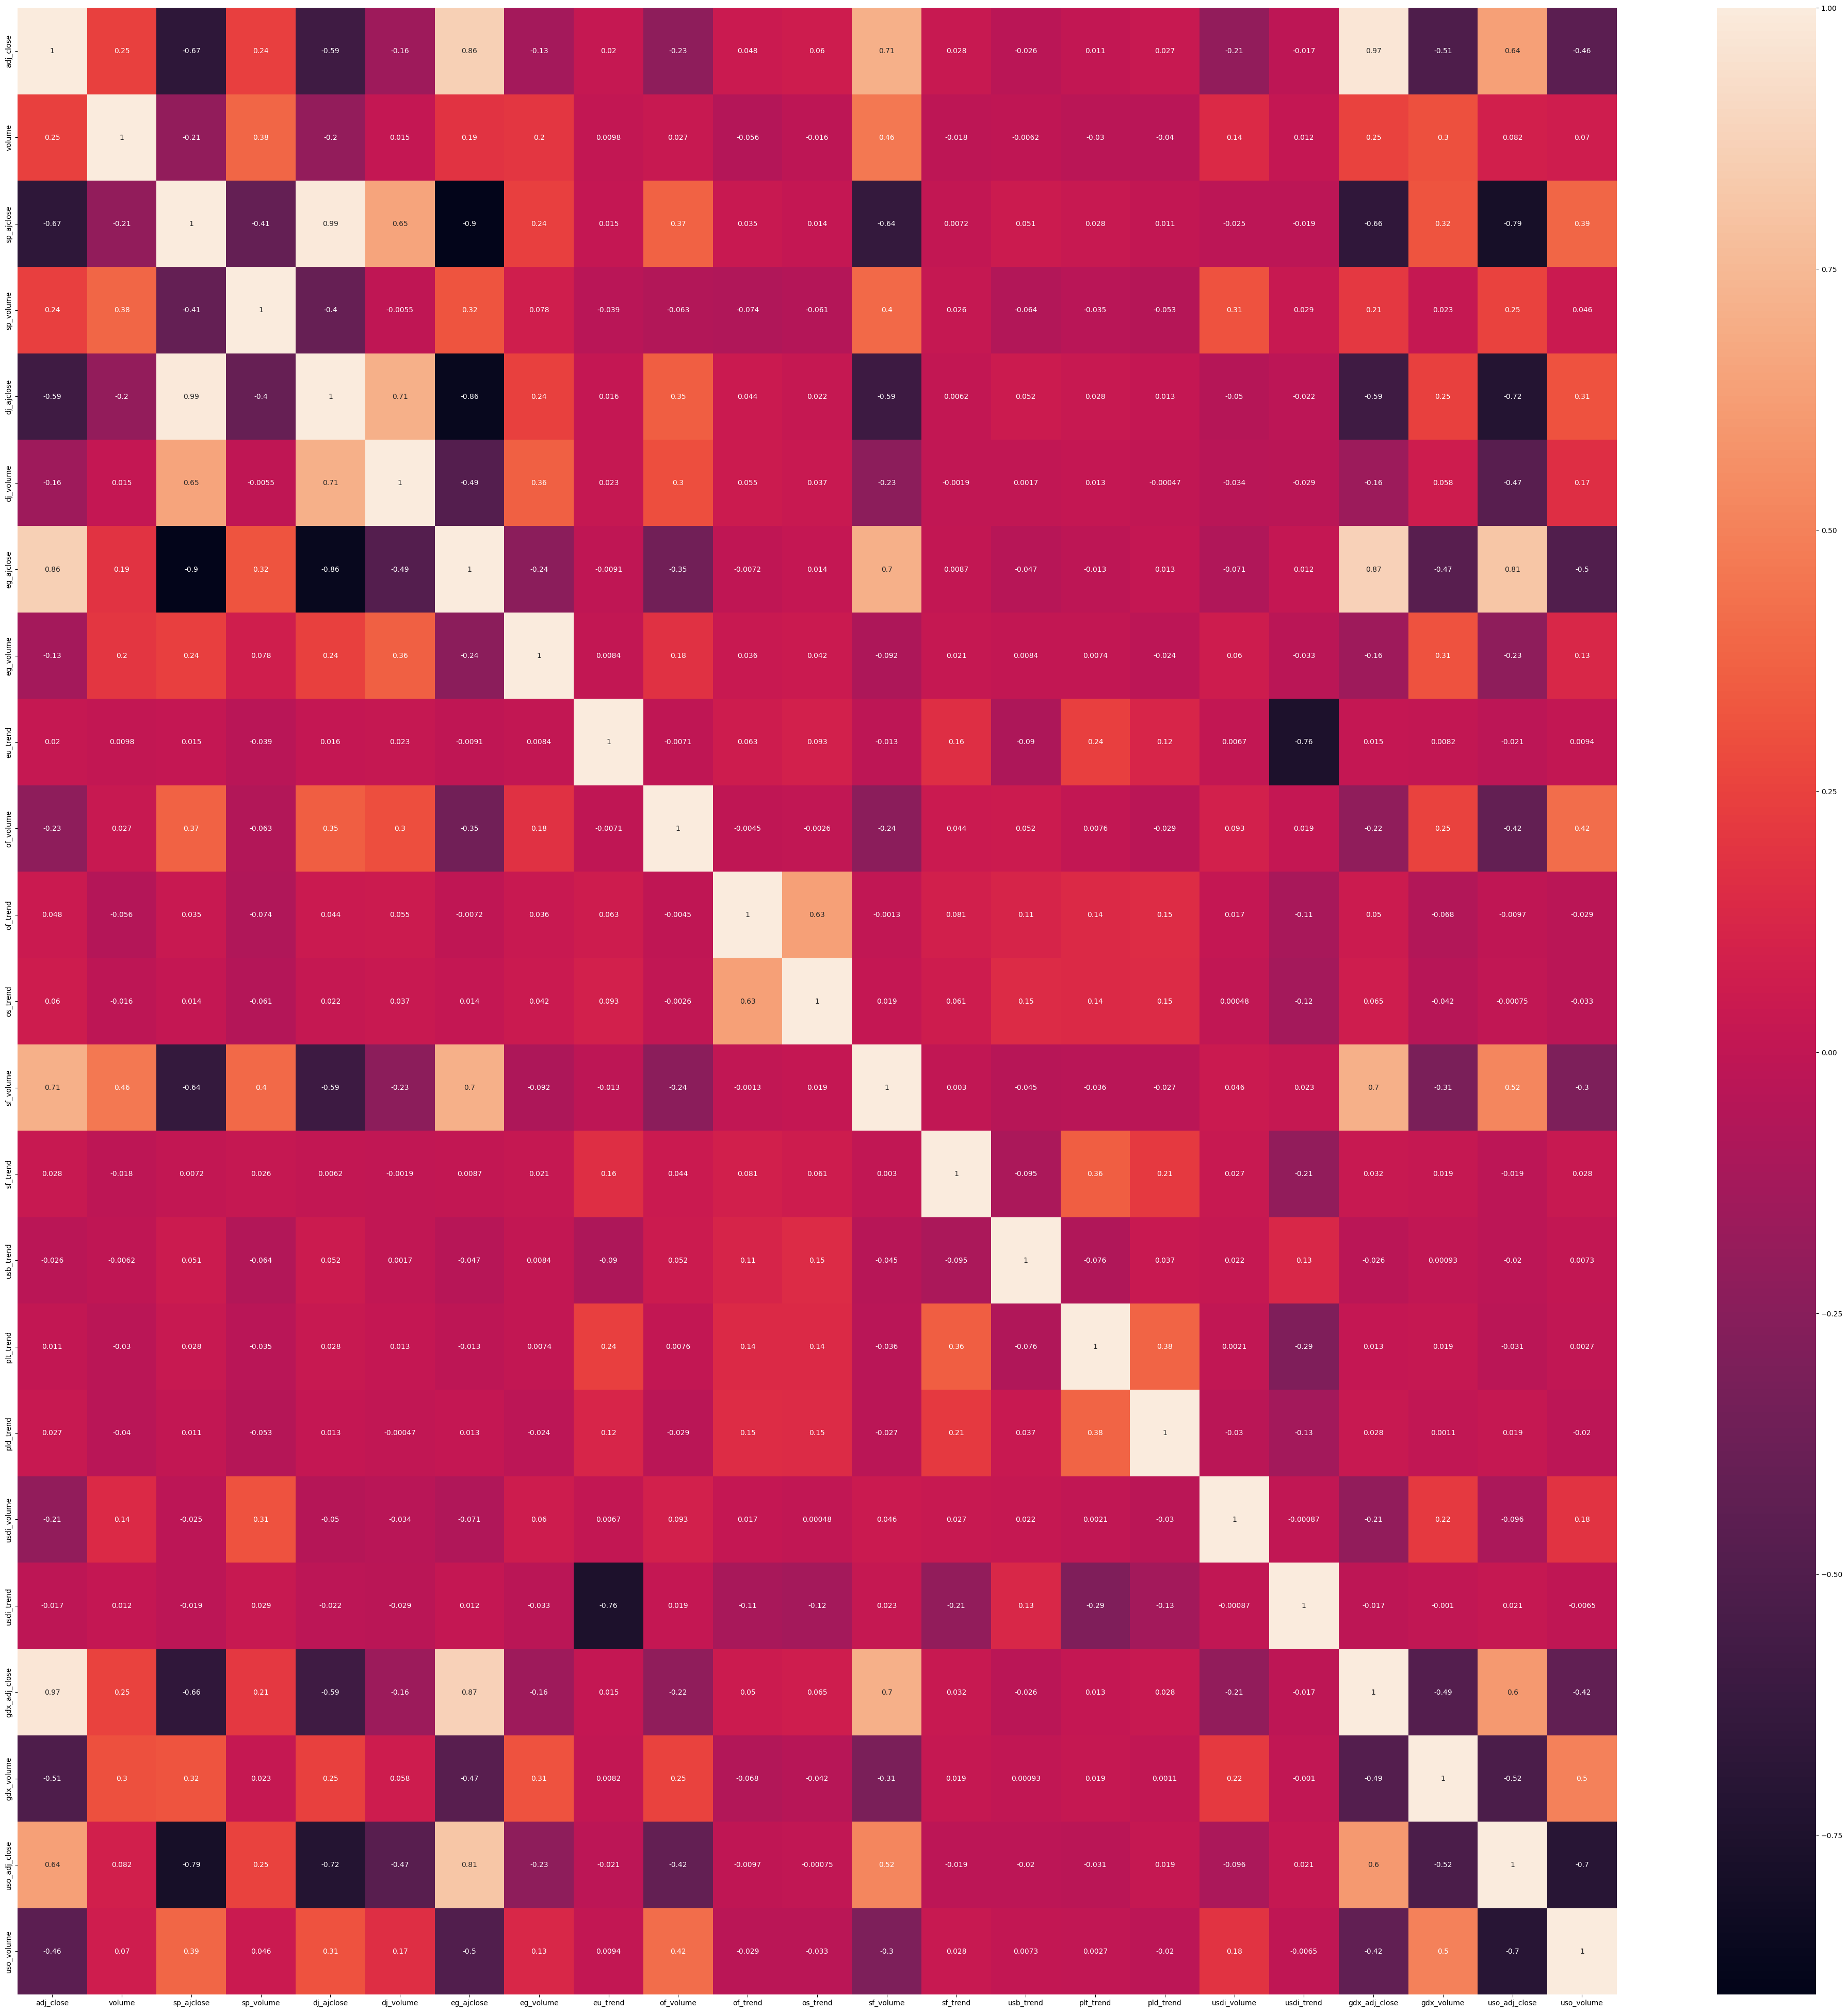

In [15]:
plt.figure(figsize=(50, 50)) 
sns.heatmap(df_final.corr(), annot = True)

In [17]:
df_final.isnull().values.any()

False

### Validation framework


In [57]:
df_train_full, df_test = train_test_split(df_final, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train = df_train.adj_close.values
y_val = df_val.adj_close.values
y_test = df_test.adj_close.values

del df_train['adj_close']
del df_val['adj_close']
del df_test['adj_close']

len(df_train), len(df_val), len(df_test)

(1030, 344, 344)

### Linear regression

i feel lucky...

In [65]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [78]:
w0, w = train_linear_regression(df_train, y_train)
y_pred = w0 + df_val.dot(w)

rmse(y_val, y_pred)

3.6608507333407063

bruh

In [81]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [82]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.5f' % (r, rmse_val))

     0 3.66085
 1e-06 3.66085
0.0001 3.66086
 0.001 3.66095
  0.01 3.66192
   0.1 3.67455
     1 3.94209
     5 4.88813
    10 5.34013


understandable, have a nice day

linear regression with regularisation coef=10 descrbes only 5% of data. this is the best result so far